In [3]:
%matplotlib inline
import warnings
#warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import sklearn
import csv
import codecs
from math import log
import pdb

## 1data

In [4]:
feature_name_src = ''
with open('../data/feat_name','r') as csvfile:
    for line in csvfile:
        line = line.strip('\n')
        line = line.split(',')
        feature_name_src = line
feature_name_src = np.array(feature_name_src)

In [5]:
feature_name_src

array(['sample_key', 'sample_id', 'name_len1', 'name_len2',
       'name_val_editdist', 'name_lcs_clr', 'name_lcs_crr', 'name_clr',
       'name_crr', 'adcode_match', 'geo_diffx ', 'geo_diffy', 'tel_match',
       'brand_match', 'cate1', 'cate2', 'cate3', 'cate_index', 'dist',
       'label'], dtype='<U17')

In [6]:
train_sample_src = list()
train_label_src = list()
row_cnt = 0
with open('../data/zjq_wm_poi_match_train_feat_mini','r') as csvfile:
    for line in csvfile:
        line = line.strip('\n')
        line = line.split('\t')
        row_cnt +=1
        if row_cnt %100000 == 0:
            print('process %dth'%row_cnt)
        if len(line) != len(feature_name_src):
            print('invalid data:','\t'.join(line))
            continue
        
        train_sample_src.append(line[1:-1])
        train_label_src.append(int(line[-1]))


train_sample_src = np.array(train_sample_src)
train_label_src = np.array(train_label_src)
print ('src train.shape',np.array(train_sample_src).shape) 

process 100000th
src train.shape (100000, 18)


In [7]:
print(train_sample_src[0])
print(train_label_src[0])

['1' '1' '2' '2.0' '0.0' '0.0' '0.0' '0.0' '3' '2' '0' '2' '2' '1' '1' '1'
 '339' '808']
0


In [8]:
test_sample_src = list()
test_label_src = list()
row_cnt = 0
with open('../data/zjq_wm_poi_match_test_feat_mini','r') as csvfile:
    for line in csvfile:
        line = line.strip('\n')
        line = line.split('\t')
        row_cnt +=1
        if row_cnt %100000 == 0:
            print('process %dth'%row_cnt)
        if len(line) != len(feature_name_src):
            print('invalid data:','\t'.join(line))
            continue
        
        test_sample_src.append(line[1:-1])
        test_label_src.append(int(line[-1]))


test_sample_src = np.array(test_sample_src)
test_label_src = np.array(test_label_src)
print ('src train.shape',np.array(test_sample_src).shape) 

src train.shape (10000, 18)


In [9]:
train_sample_src[0]

array(['1', '1', '2', '2.0', '0.0', '0.0', '0.0', '0.0', '3', '2', '0',
       '2', '2', '1', '1', '1', '339', '808'], dtype='<U20')

## 1.1 打乱顺序

In [10]:
print ('src train feat shape',train_sample_src.shape) 
print ('src train label shape',train_label_src.shape)
from sklearn.utils import shuffle
train_sample_shuffle,train_label = shuffle(train_sample_src,train_label_src)

src train feat shape (100000, 18)
src train label shape (100000,)


In [11]:
print ('src test feat shape',test_sample_src.shape) 
print ('src test label shape',test_label_src.shape)
from sklearn.utils import shuffle
test_sample_shuffle,test_label = shuffle(test_sample_src,test_label_src)

src test feat shape (10000, 18)
src test label shape (10000,)


## 1.2 train test split

# 2feature

## 2.1  feature preprocessing

In [12]:
for i,j in enumerate(feature_name_src):print (i,j)

0 sample_key
1 sample_id
2 name_len1
3 name_len2
4 name_val_editdist
5 name_lcs_clr
6 name_lcs_crr
7 name_clr
8 name_crr
9 adcode_match
10 geo_diffx 
11 geo_diffy
12 tel_match
13 brand_match
14 cate1
15 cate2
16 cate3
17 cate_index
18 dist
19 label


In [13]:
def feature_processing(data_src,label):
    '''
    特征预处理&样本权重
    '''
    assert len(data_src) == len(label)
    data_src = np.array(data_src)
    m,n = np.array(data_src).shape
    sample_weight = np.ones(m)
    train_data = list()
    for i in range(m): 
        data = [float(item) for item in data_src[i][7:]]
        #
        #print (data,label[i])
        ## sample weight ##异地则提权
        search_ad = data_src[i][1]
        user_ad = data_src[i][3]
        target_ad = data_src[i][6]
        i_label = int(label[i])
        if target_ad != search_ad and 1 == int(i_label): 
            sample_weight[i] = 6
        
        train_data.append(data)
        
    return np.array(train_data),sample_weight,label


In [14]:
#sample_index = 7
#print ([i for i in x_train_src[sample_index ]],y_train_src[sample_index ])
#x_train_norm,train_weight,y_train_norm = feature_processing(x_train_src,y_train_src)
#x_test_norm,test_weight,y_test_norm = feature_processing(x_test_src,y_test_src)
#print ([i for i in x_train_norm[sample_index ,:]],y_train_norm[sample_index ],train_weight[sample_index ])

In [15]:
x_train_norm,y_train_norm = train_sample_shuffle,train_label
x_test_norm,y_test_norm = test_sample_shuffle,test_label

## 2.2eda 

In [16]:
import featexp

In [17]:
import pandas as pd

In [18]:
x_train_norm.shape

(100000, 18)

In [19]:
df_train = pd.DataFrame(np.c_[x_train_norm[:,1:],y_train_norm],dtype='float')
df_test = pd.DataFrame(np.c_[x_test_norm[:,1:],y_test_norm],dtype='float')

In [20]:
df_train.columns = feature_name_src[2:]
df_test.columns = feature_name_src[2:]

In [21]:
df_train.head()

,name_len1,name_len2,name_val_editdist,name_lcs_clr,name_lcs_crr,name_clr,name_crr,adcode_match,geo_diffx,geo_diffy,tel_match,brand_match,cate1,cate2,cate3,cate_index,dist,label
0,6.0,3.0,3.0,0.500000,1.000000,0.500000,1.000000,3.0,2.0,5.0,2.0,2.0,1.0,1.0,1.0,433.0,2528.0,0.0
1,9.0,7.0,3.0,0.666667,0.857143,0.777778,0.857143,3.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,3.0,20.0,1.0
2,6.0,4.0,2.0,0.666667,1.000000,0.666667,1.000000,3.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,4.0,6.0,1.0
3,4.0,4.0,1.0,0.750000,0.750000,0.750000,0.750000,3.0,0.0,0.0,4.0,2.0,1.0,1.0,1.0,205.0,0.0,0.0
4,6.0,7.0,3.0,0.666667,0.571429,0.666667,0.571429,3.0,0.0,0.0,4.0,2.0,1.0,1.0,1.0,472.0,48.0,0.0


In [22]:
df_test.head()

,name_len1,name_len2,name_val_editdist,name_lcs_clr,name_lcs_crr,name_clr,name_crr,adcode_match,geo_diffx,geo_diffy,tel_match,brand_match,cate1,cate2,cate3,cate_index,dist,label
0,7.0,7.0,6.0,0.285714,0.285714,0.285714,0.285714,3.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,551.0,2.0,1.0
1,4.0,3.0,2.0,0.500000,0.666667,0.500000,0.666667,3.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,472.0,6.0,1.0
2,7.0,5.0,4.0,0.428571,0.600000,0.428571,0.600000,3.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,205.0,401.0,0.0
3,8.0,6.0,7.0,0.125000,0.166667,0.125000,0.166667,3.0,1.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,582.0,0.0
4,5.0,5.0,2.0,0.800000,0.800000,0.800000,0.800000,3.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,473.0,123.0,0.0


In [23]:
#featexp.get_trend_correlation?

In [24]:
#featexp.get_univariate_plots?

                                         Plots for name_len1                                          
                                           Train data plots                                           


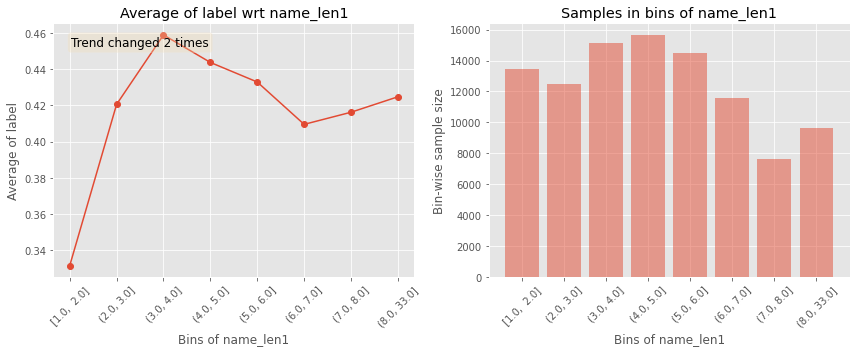

                                           Test data plots                                            


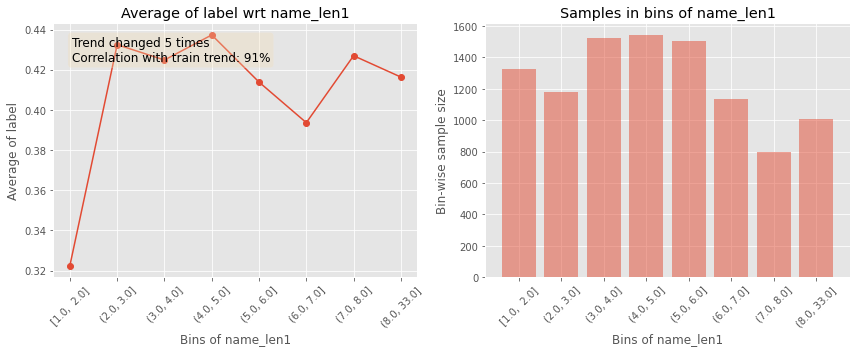

--------------------------------------------------------------------------------------------------------------


                                         Plots for name_len2                                          
                                           Train data plots                                           


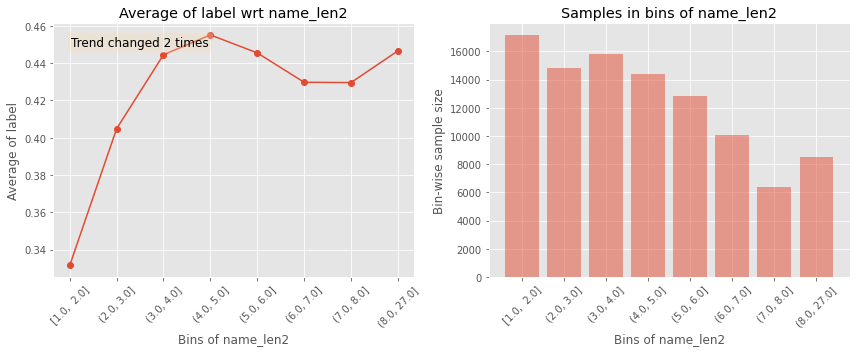

                                           Test data plots                                            


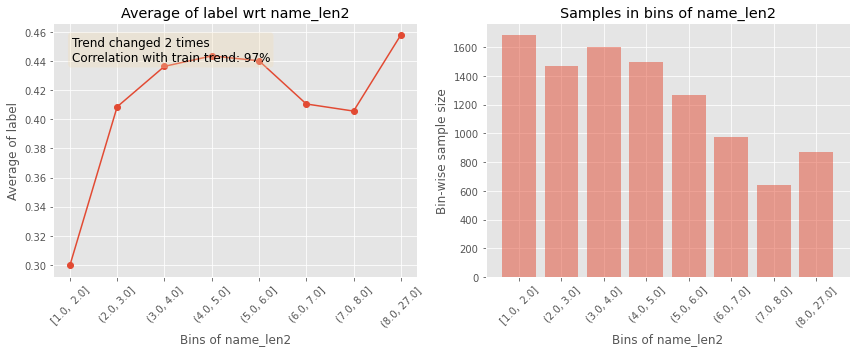

--------------------------------------------------------------------------------------------------------------


                                     Plots for name_val_editdist                                      
                                           Train data plots                                           


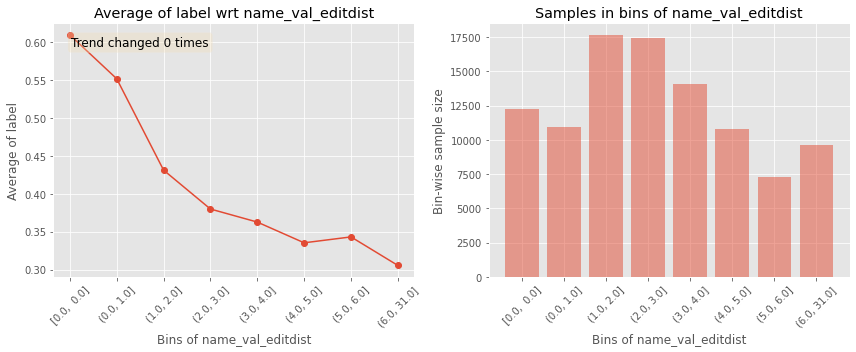

                                           Test data plots                                            


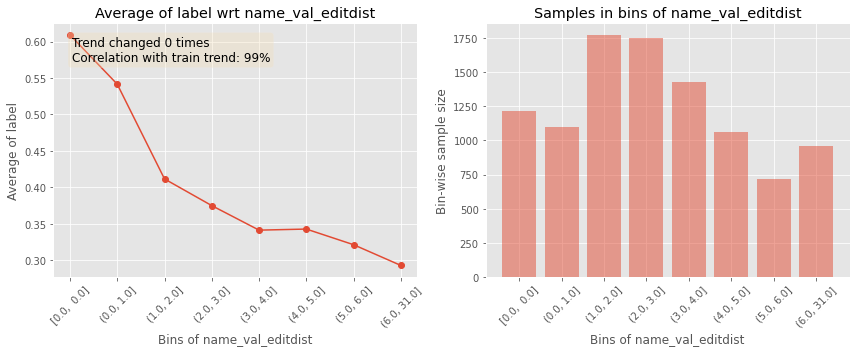

--------------------------------------------------------------------------------------------------------------


                                        Plots for name_lcs_clr                                        
                                           Train data plots                                           


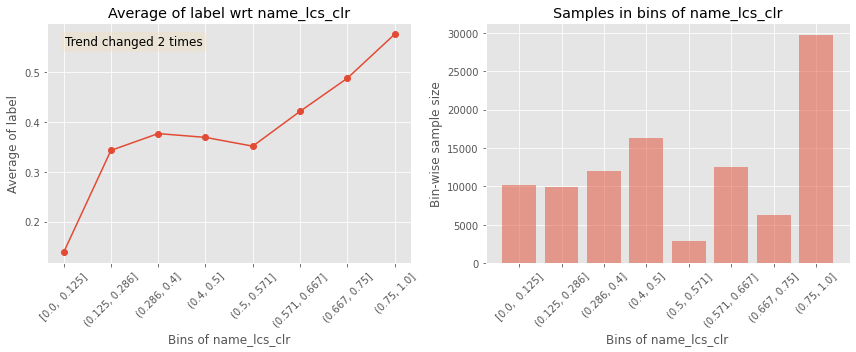

                                           Test data plots                                            


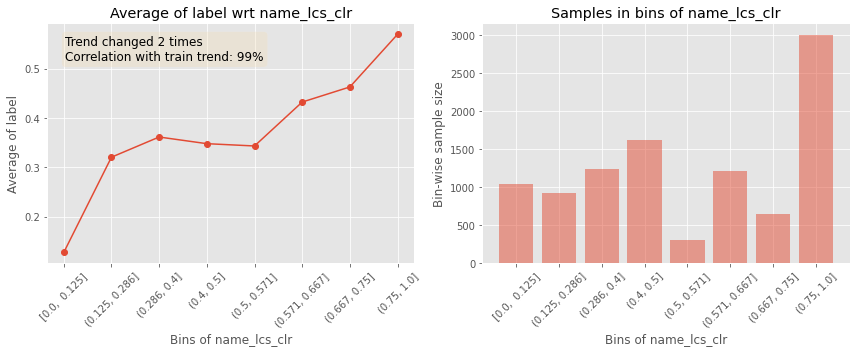

--------------------------------------------------------------------------------------------------------------


                                        Plots for name_lcs_crr                                        
                                           Train data plots                                           


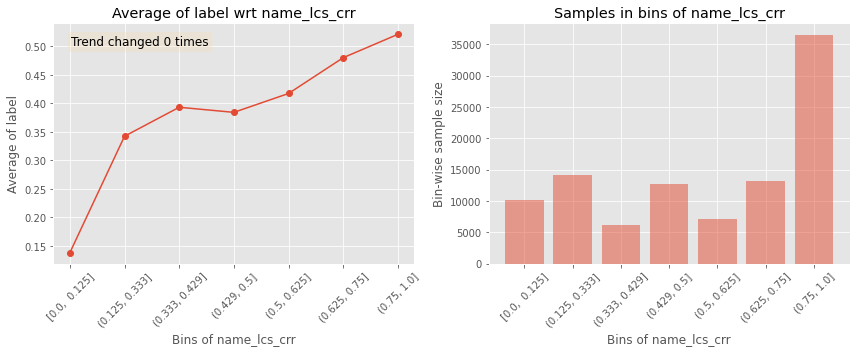

                                           Test data plots                                            


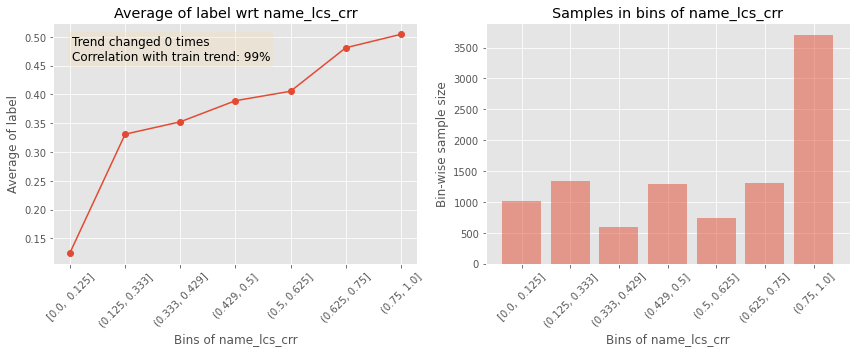

--------------------------------------------------------------------------------------------------------------


                                          Plots for name_clr                                          
                                           Train data plots                                           


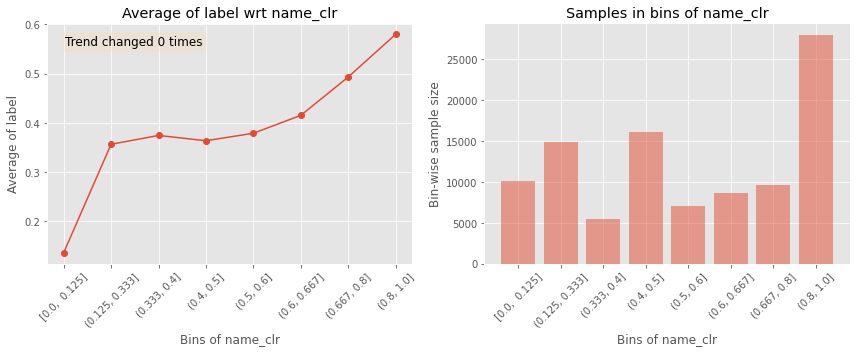

                                           Test data plots                                            


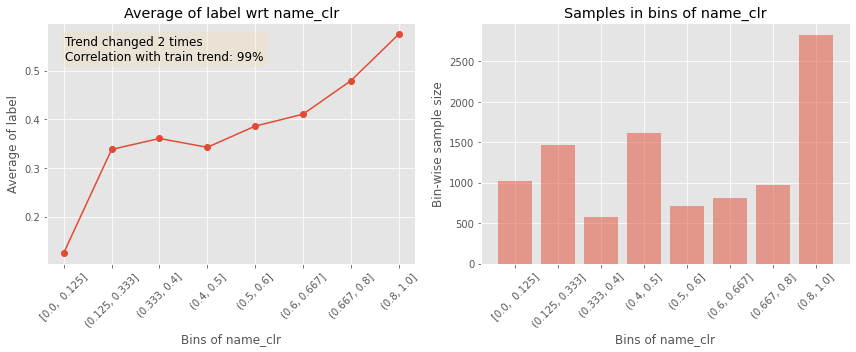

--------------------------------------------------------------------------------------------------------------


                                          Plots for name_crr                                          
                                           Train data plots                                           


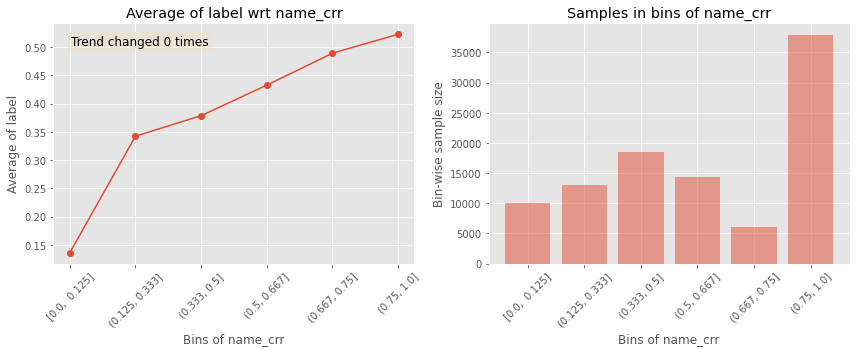

                                           Test data plots                                            


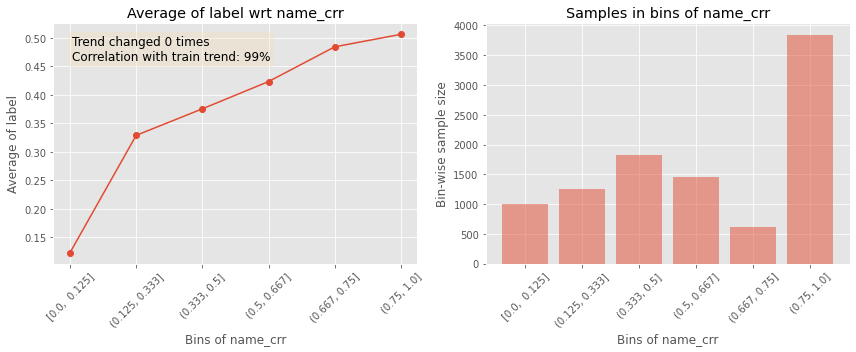

--------------------------------------------------------------------------------------------------------------


                                        Plots for adcode_match                                        
Only one bin created for adcode_match. Correlation can't be calculated
                                           Train data plots                                           


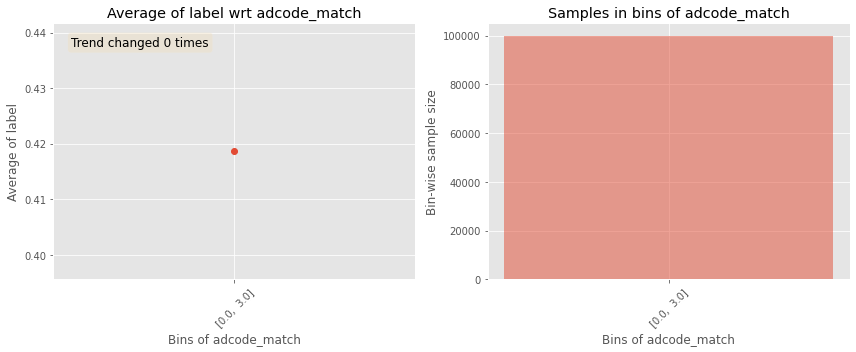

                                           Test data plots                                            


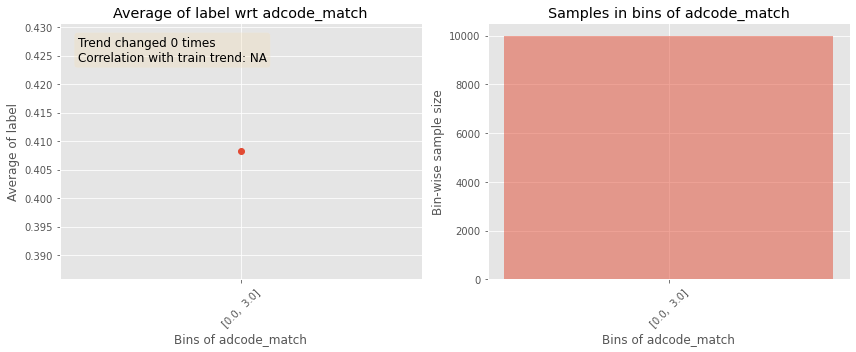

--------------------------------------------------------------------------------------------------------------


                                         Plots for geo_diffx                                          
                                           Train data plots                                           


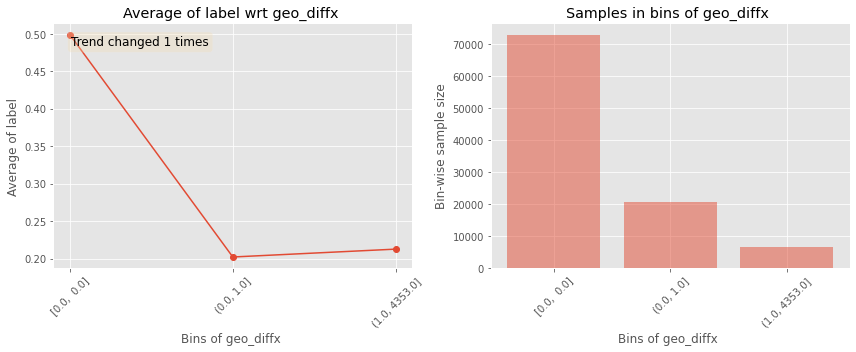

                                           Test data plots                                            


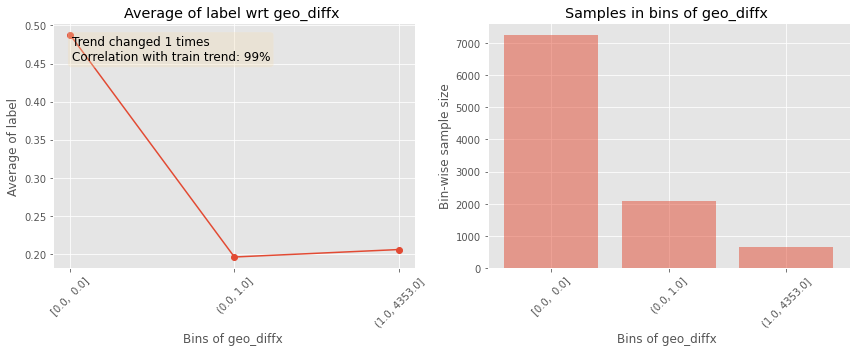

--------------------------------------------------------------------------------------------------------------


                                         Plots for geo_diffy                                          
                                           Train data plots                                           


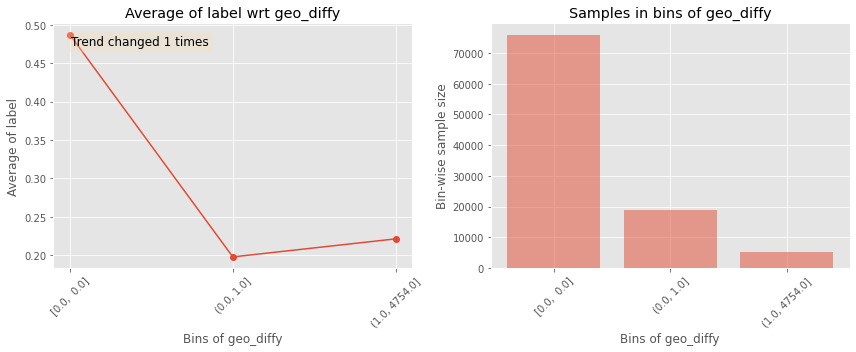

                                           Test data plots                                            


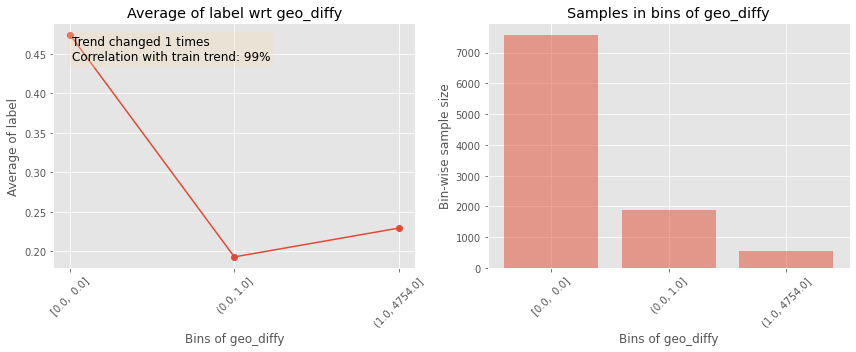

--------------------------------------------------------------------------------------------------------------


                                         Plots for tel_match                                          
                                           Train data plots                                           


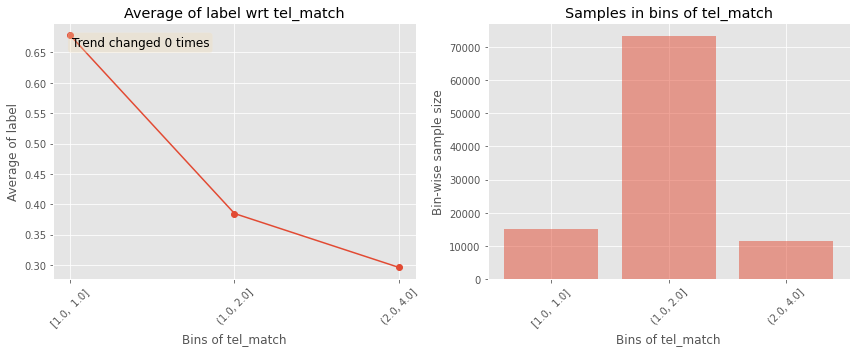

                                           Test data plots                                            


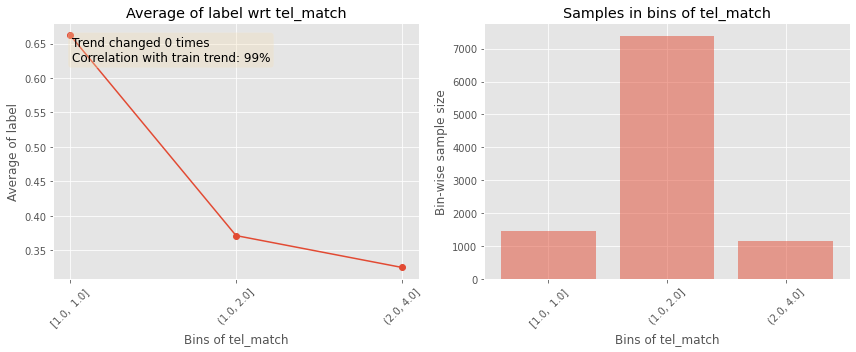

--------------------------------------------------------------------------------------------------------------


                                        Plots for brand_match                                         
                                           Train data plots                                           


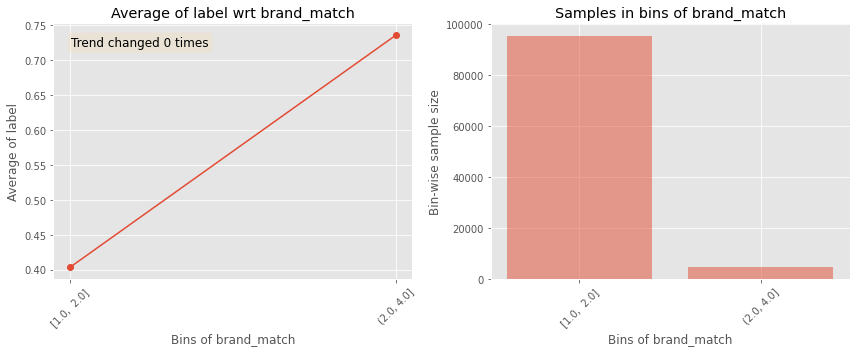

                                           Test data plots                                            


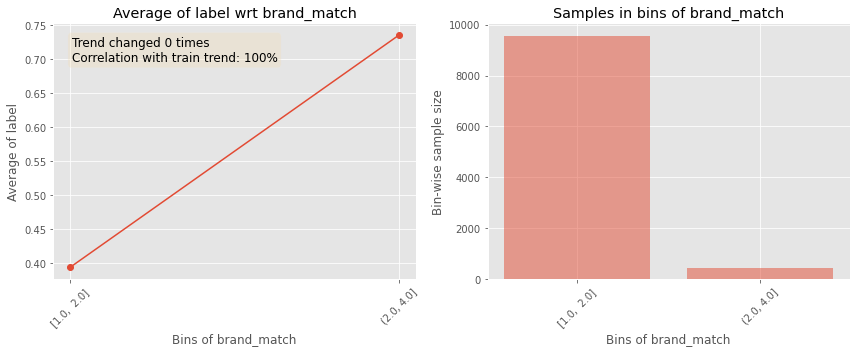

--------------------------------------------------------------------------------------------------------------


                                           Plots for cate1                                            
                                           Train data plots                                           


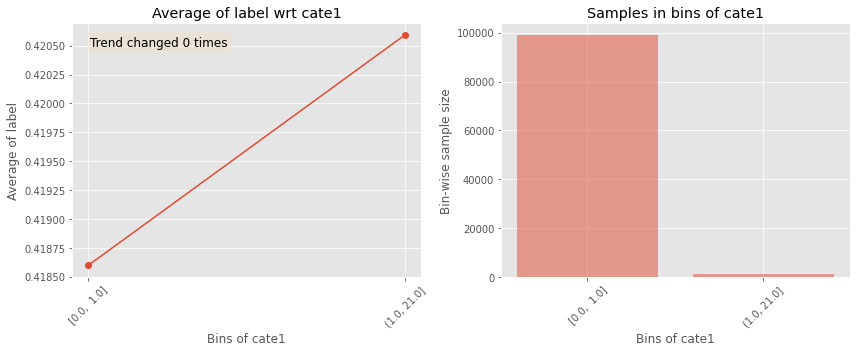

                                           Test data plots                                            


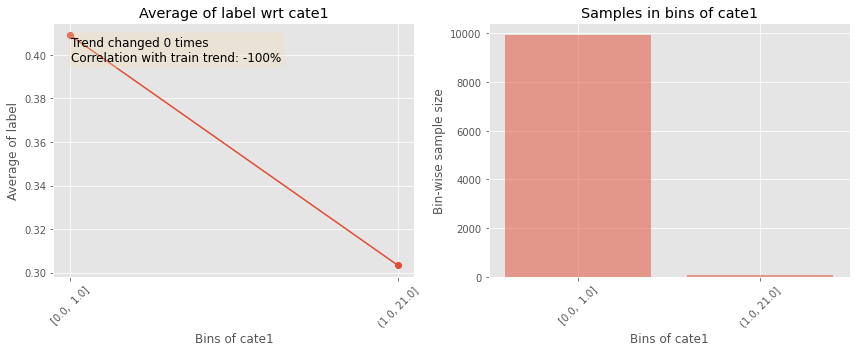

--------------------------------------------------------------------------------------------------------------


                                           Plots for cate2                                            
                                           Train data plots                                           


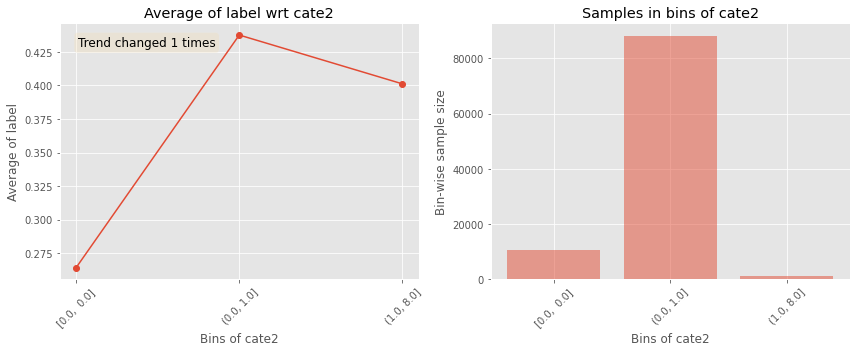

                                           Test data plots                                            


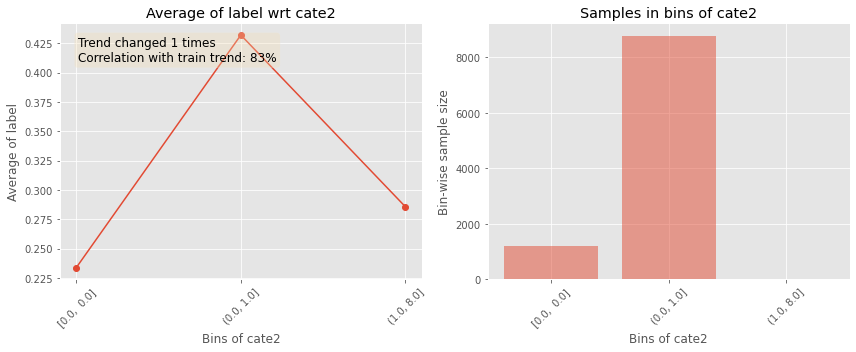

--------------------------------------------------------------------------------------------------------------


                                           Plots for cate3                                            
                                           Train data plots                                           


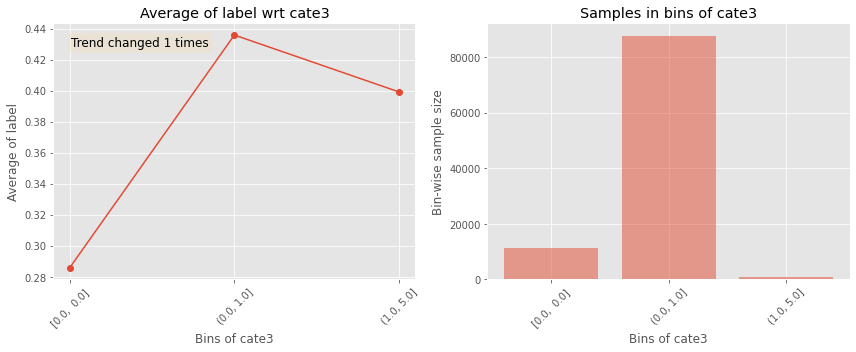

                                           Test data plots                                            


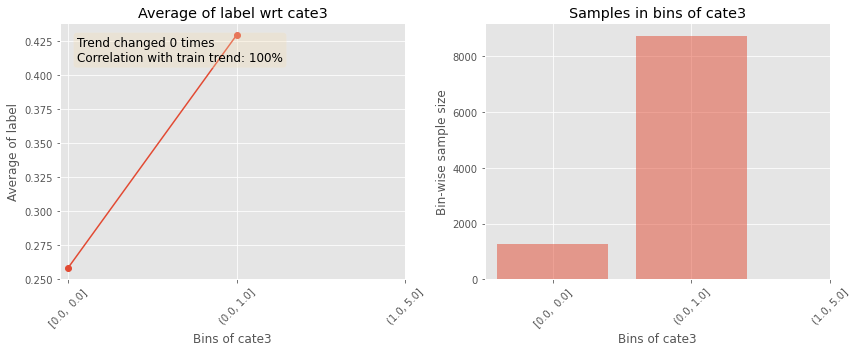

--------------------------------------------------------------------------------------------------------------


                                         Plots for cate_index                                         
                                           Train data plots                                           


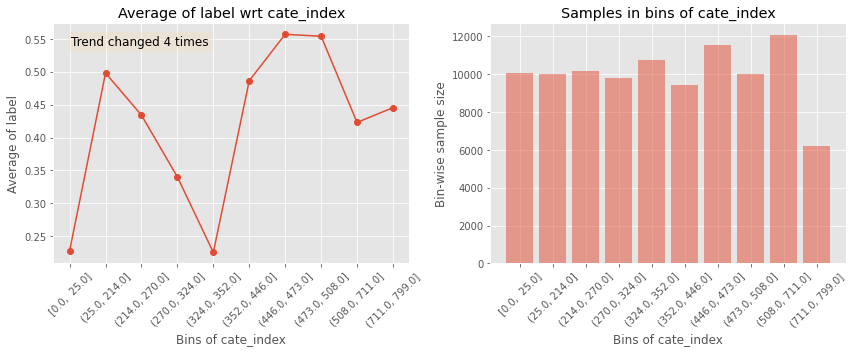

                                           Test data plots                                            


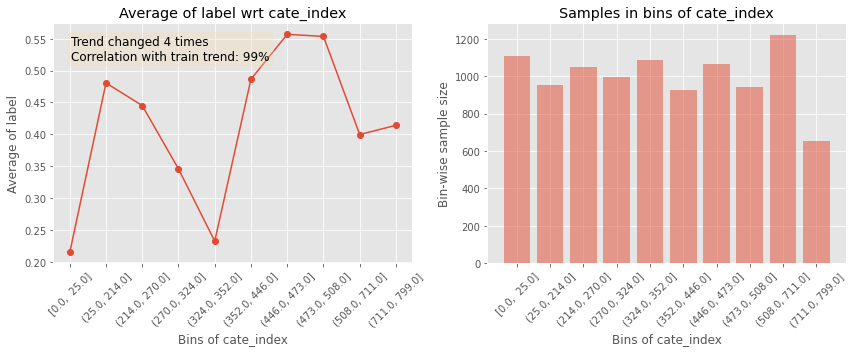

--------------------------------------------------------------------------------------------------------------


                                            Plots for dist                                            
                                           Train data plots                                           


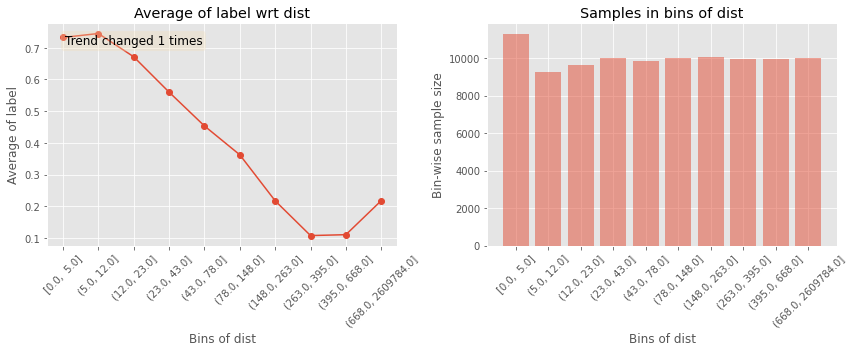

                                           Test data plots                                            


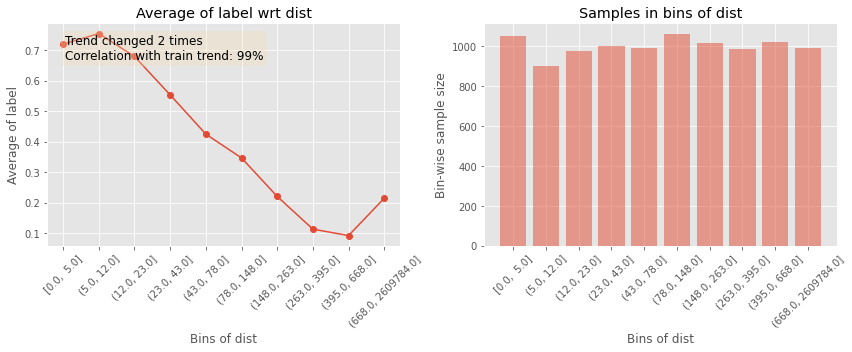

--------------------------------------------------------------------------------------------------------------




In [25]:
featexp.get_univariate_plots(data=df_train,target_col='label',features_list=feature_name_src[2:-1],data_test=df_test)

In [26]:
#featexp.get_trend_stats?

In [27]:
featexp.get_trend_stats(data=df_train,target_col='label',data_test=df_test) 

Only one bin created for adcode_match. Correlation can't be calculated
Returning stats for all numeric features


,Feature,Trend_changes,Trend_changes_test,Trend_correlation
0,name_len1,2,5,0.919227
1,name_len2,2,2,0.970329
2,name_val_editdist,0,0,0.995770
3,name_lcs_clr,2,2,0.995903
4,name_lcs_crr,0,0,0.993078
5,name_clr,0,2,0.997601
6,name_crr,0,0,0.999321
7,adcode_match,0,0,0.000000
8,geo_diffx,1,1,0.999999
9,geo_diffy,1,1,0.998927


In [28]:
#featexp.get_univariate_plots(df_train,target_col='label',data_test=df_test\
#                            )#features_list=['click_score','click_num','click_score&sug_click_score'])

In [29]:
## x2  multi-info
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
def feature_analys(sample,label,feature_name):
    '''
    单特征 统计分析
    '''
    ch2_stat,p_sat = chi2(sample,label)
    ch2_fea = dict(zip(feature_name,ch2_stat))
    ch2_fea = sorted(ch2_fea.items(),key = lambda x:x[-1],reverse = True)
    print ('chi2')
    #for i,j in ch2_fea:
    #    print ('\t'.join([i,str(j)]))
     
    print ('\nmutual info')
    mi_fea = mutual_info_classif(sample,label,n_neighbors=4)
    mi_fea = zip(feature_name,mi_fea)
    #mi_fea = sorted(mi_fea.items(),key = lambda x:x[-1],reverse = True)
    #for i,j in mi_fea:
        #print (i,'\t',j)

In [30]:
#feature_analys(x_train_norm,y_train_norm,feature_name_src)
print (x_train_norm.shape)
print (len(y_train_norm))


(100000, 18)
100000


## 2.3 feature select

In [31]:
feature_name_src

array(['sample_key', 'sample_id', 'name_len1', 'name_len2',
       'name_val_editdist', 'name_lcs_clr', 'name_lcs_crr', 'name_clr',
       'name_crr', 'adcode_match', 'geo_diffx ', 'geo_diffy', 'tel_match',
       'brand_match', 'cate1', 'cate2', 'cate3', 'cate_index', 'dist',
       'label'], dtype='<U17')

In [32]:
feature_map = dict(zip(feature_name_src[1:-1],range(len(feature_name_src[1:-1]))))
for i ,j in feature_map.items():
    print (i,j)
    pass
    
feature_name = [#'sample_id',
                'name_len1', 'name_len2',
       'name_val_editdist', 'name_lcs_clr', 'name_lcs_crr', 'name_clr',
       'name_crr', 'adcode_match', 'geo_diffx ', 'geo_diffy', 'tel_match',
       'brand_match', 'cate1', 'cate2', 'cate3', 'cate_index', 'dist'
               ]
print(feature_name)

sample_id 0
name_len1 1
name_len2 2
name_val_editdist 3
name_lcs_clr 4
name_lcs_crr 5
name_clr 6
name_crr 7
adcode_match 8
geo_diffx  9
geo_diffy 10
tel_match 11
brand_match 12
cate1 13
cate2 14
cate3 15
cate_index 16
dist 17
['name_len1', 'name_len2', 'name_val_editdist', 'name_lcs_clr', 'name_lcs_crr', 'name_clr', 'name_crr', 'adcode_match', 'geo_diffx ', 'geo_diffy', 'tel_match', 'brand_match', 'cate1', 'cate2', 'cate3', 'cate_index', 'dist']


In [33]:
x_train_norm[0]

array(['193445', '6', '3', '3.0', '0.5', '1.0', '0.5', '1.0', '3', '2',
       '5', '2', '2', '1', '1', '1', '433', '2528'], dtype='<U20')

In [34]:
def feat_select(sample,feature_name,feature_map):
    #print([feature_map.get(i) for i in feature_name])
    if len(sample.shape) == 2:
        return np.array(sample[:,[feature_map.get(i) for i in feature_name]],dtype=float)
    elif len(sample.shape) == 1:
        return np.array(sample[[feature_map.get(i) for i in feature_name]])

In [35]:
x_train = feat_select(x_train_norm,feature_name,feature_map)
y_train = y_train_norm
x_test = feat_select(x_test_norm,feature_name,feature_map)
y_test = y_test_norm
print('train.shape',x_train.shape)
print('test.shape',x_test.shape)

train.shape (100000, 17)
test.shape (10000, 17)


In [36]:
x_train[0]

array([6.000e+00, 3.000e+00, 3.000e+00, 5.000e-01, 1.000e+00, 5.000e-01,
       1.000e+00, 3.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 2.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 4.330e+02, 2.528e+03])

In [37]:
y_train[0]

0

# 3-7model  loss optimize init train

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import plot_importance

In [39]:
#xgb.XGBClassifier.fit?

In [40]:
#GradientBoostingClassifier.fit?

## 3.1批量训练

In [41]:
from sklearn.metrics import f1_score

In [42]:
xgb.__version__

'1.5.2'

In [43]:
print('gbdt')
gbdt = GradientBoostingClassifier(n_estimators=150,min_samples_split=20,learning_rate=0.02,max_features='auto',
                                  min_samples_leaf=10,max_depth=5,
                                  subsample=0.8,#warm_start=True,
                                  verbose=1
                                 )
#gbdt.fit(x_train,y_train)#,sample_weight=train_weight)

print('xgb')
xgbdt = xgb.XGBClassifier(n_estimators=150,learning_rate=0.1,
                                   min_child_weight=10,max_depth=5,use_label_encoder=False,
                                  subsample=0.8,#warm_start=True,
                                  missing=-1
                                 )
xgbdt.fit(x_train,y_train,verbose=True,eval_set=[(x_train,y_train),(x_test,y_test)])#,sample_weight=train_weight)  


print('rf')
rf = RandomForestClassifier(n_estimators=20,max_depth=20,min_samples_leaf=10,oob_score=True,
                            max_features='auto',
                            min_samples_split=10)
rf.fit(x_train,y_train)

print('lr')
lr = LogisticRegression()
#lr.fit(x_train,y_train)

gbdt
xgb
[21:14:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.65778	validation_1-logloss:0.65739
[1]	validation_0-logloss:0.62881	validation_1-logloss:0.62820
[2]	validation_0-logloss:0.60467	validation_1-logloss:0.60385
[3]	validation_0-logloss:0.58420	validation_1-logloss:0.58332
[4]	validation_0-logloss:0.56664	validation_1-logloss:0.56599
[5]	validation_0-logloss:0.55161	validation_1-logloss:0.55070
[6]	validation_0-logloss:0.53889	validation_1-logloss:0.53805
[7]	validation_0-logloss:0.52786	validation_1-logloss:0.52712
[8]	validation_0-logloss:0.51763	validation_1-logloss:0.51700
[9]	validation_0-logloss:0.50882	validation_1-logloss:0.50839
[10]	validation_0-logloss:0.50114	validation_1-logloss:0.50078
[11]	validation_0-logloss:0.49393	validation_1-logloss:0

/home/bingfa.zjq/.local/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/bingfa.zjq/.local/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [47]:
xgbdt.save_model('./model/match_model_xgb_0516')

In [48]:
xgbdt2 = xgb.XGBClassifier(n_estimators=150,learning_rate=0.1,
                                   min_child_weight=10,max_depth=5,use_label_encoder=False,
                                  subsample=0.8,#warm_start=True,
                                  missing=-1
                                 )

In [49]:
xgbdt2.load_model('./model/match_model_xgb_0516')

# 8 eval stage

In [51]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [52]:
def eval_metrics(y_true,y_pre):
    roc = roc_auc_score(y_true,y_pre)
    f1 = f1_score(y_true,y_pre)
    p = precision_score(y_true,y_pre)
    r = recall_score(y_true,y_pre)
    print('\t\troc\tf1\tp\tr')
    print('\t\t%f\t%f\t%f\t%f'%(roc,f1,p,r))

In [53]:
model_dict = {"xgboost":xgbdt,"rf":rf,'xgb2':xgbdt2}
for key,value in model_dict.items():
    print ("key train",key)
    eval_metrics(y_train,value.predict(x_train))
    print ("key test",key)
    eval_metrics(y_test,value.predict(x_test))

key train xgboost
		roc	f1	p	r
		0.821709	0.793854	0.773659	0.815131
key test xgboost
		roc	f1	p	r
		0.817073	0.784163	0.768399	0.800588
key train rf
		roc	f1	p	r
		0.838913	0.813407	0.790479	0.837705
key test rf
		roc	f1	p	r
		0.807615	0.773384	0.754721	0.792994
key train xgb2
		roc	f1	p	r
		0.821709	0.793854	0.773659	0.815131
key test xgb2
		roc	f1	p	r
		0.817073	0.784163	0.768399	0.800588


# 9 model debug by skater

## 9.1 feat importance

In [46]:
plot_importance?

In [47]:
feature_map

{'sample_id': 0,
 'name_len1': 1,
 'name_len2': 2,
 'name_val_editdist': 3,
 'name_lcs_clr': 4,
 'name_lcs_crr': 5,
 'name_clr': 6,
 'name_crr': 7,
 'adcode_match': 8,
 'geo_diffx ': 9,
 'geo_diffy': 10,
 'tel_match': 11,
 'brand_match': 12,
 'cate1': 13,
 'cate2': 14,
 'cate3': 15,
 'cate_index': 16,
 'dist': 17}

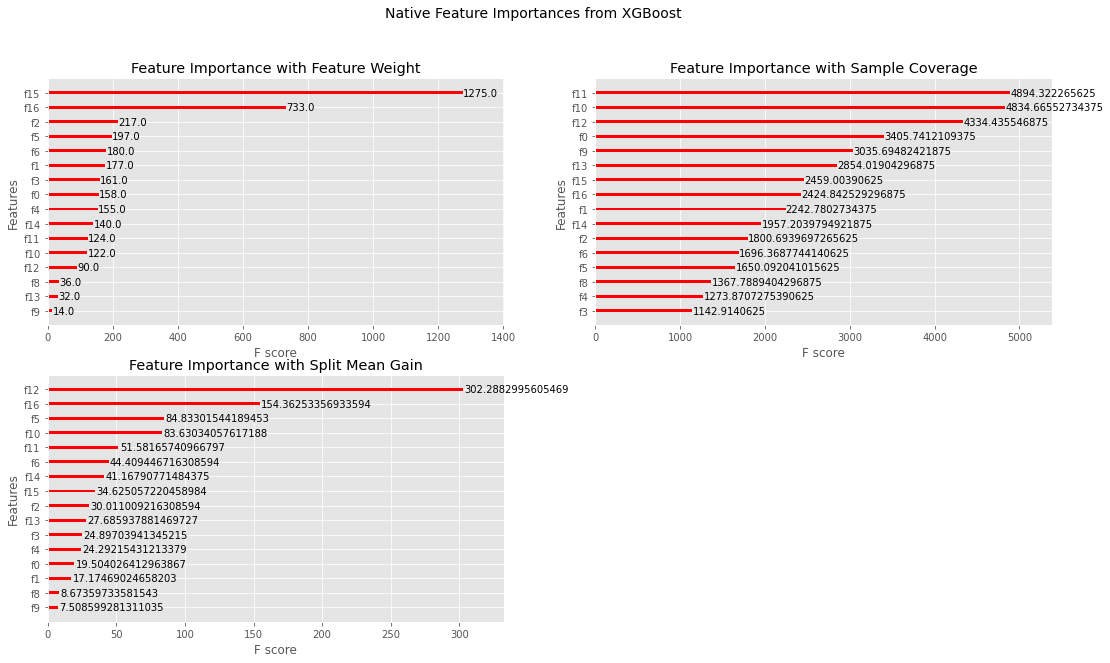

In [48]:
fig = plt.figure(figsize = (18, 10))
title = fig.suptitle("Native Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2, 2, 1)
plot_importance(xgbdt, importance_type='weight', ax=ax1, color='red')
ax1.set_title("Feature Importance with Feature Weight");

ax2 = fig.add_subplot(2, 2, 2)
plot_importance(xgbdt, importance_type='cover', ax=ax2, color='red')
ax2.set_title("Feature Importance with Sample Coverage");

ax3 = fig.add_subplot(2, 2, 3)
plot_importance(xgbdt, importance_type='gain', ax=ax3, color='red')
ax3.set_title("Feature Importance with Split Mean Gain");

In [49]:
from six import StringIO
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [50]:
##大于5000 不采样时，要设置label
interpreter = Interpretation(x_train,training_labels=y_train, feature_names=feature_name)

In [51]:
InMemoryModel?

In [ ]:
f, axes = plt.subplots(2,2, figsize = (16, 16))

ax_dict = {
    'xgboost':axes[0][0],
    'gbdt':axes[0][1],
    'rf':axes[1][0],
    #'lr':axes[1][0]
}

for model_key in ['rf']:
    pyint_model = InMemoryModel(model_dict[model_key].predict_proba, examples=x_train)
    ax = ax_dict[model_key]
    interpreter.feature_importance.plot_feature_importance(pyint_model, ax=ax, ascending = True,progressbar=True)
    ax.set_title(model_key)

2023-05-16 16:44:11,818 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[17/17] features ████████████████████ Time elapsed: 4 seconds

2023-05-16 16:46:09,628 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False
2023-05-16 16:59:55,641 - skater.core.explanations - WARNING - Multiprocessing failed, going single process
Process ForkPoolWorker-48:
Process ForkPoolWorker-46:
Process ForkPoolWorker-42:
Process ForkPoolWorker-44:
Process ForkPoolWorker-43:
Process ForkPoolWorker-45:
Process ForkPoolWorker-47:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/bingfa.zjq/.local/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/bingfa.zjq/.local/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/bingfa.zjq/.local/lib/python3.6/site-packages/multiprocess/process.py", line 

[1/17] features █------------------- Time elapsed: 826 seconds

KeyboardInterrupt
KeyboardInterrupt
  File "/home/bingfa.zjq/.local/lib/python3.6/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
  File "/home/bingfa.zjq/.local/lib/python3.6/site-packages/multiprocess/connection.py", line 219, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
  File "/home/bingfa.zjq/.local/lib/python3.6/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/bingfa.zjq/.local/lib/python3.6/site-packages/multiprocess/connection.py", line 410, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
  File "/home/bingfa.zjq/.local/lib/python3.6/site-packages/multiprocess/connection.py", line 382, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


[7/17] features ████████------------ Time elapsed: 828 seconds

Process ForkPoolWorker-49:
Process ForkPoolWorker-51:
Process ForkPoolWorker-53:
Process ForkPoolWorker-55:
Process ForkPoolWorker-50:
Process ForkPoolWorker-54:
Process ForkPoolWorker-52:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/bingfa.zjq/.local/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
  File "/home/bingfa.zjq/.local/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/bingfa.zjq/.local/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
  File "/home/bingfa.zjq/.local/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
  File "/home/bingfa.zjq/.local/lib/python3.6/site-packages/multip

## 9.2 pdp

In [1]:
#interpreter.partial_dependence.plot_partial_dependence

NameError: name 'interpreter' is not defined

In [2]:
for feat_index,i in enumerate(feature_name):
    print(feat_index,i)

NameError: name 'feature_name' is not defined

In [ ]:
def step_pdp(model,data,index ,value ):
    
    data_cp = data.copy()
    #print(data_cp[:,16])
    data_cp[:,index]= value
    #print(data_cp[:,16])
    res = model.predict_proba(data_cp)
    #print (res[:,-1])
    mean = np.mean(res[:,-1])
    std = np.std(res[:,-1])
    #print (mean,std)
    return mean,std
    
    
def pdp(model,data,feature_map,feature_name):
    for feat_index,i in enumerate(feature_name):
        #feat_index = feature_map.get(i)
        if 'ent' in i or 'num' in i:
            continue
        if i != 'phrase_all_score':
            continue
        value_min,value_max = np.min(data[:,feat_index]),np.max(data[:,feat_index])
        for j in np.arange(value_min,value_max+0.1,0.05):
            mean,std = step_pdp(model,data,feat_index,j)
            print (i,j,mean,std)

In [ ]:
pdp(gbdt,x_train,feature_map,feature_name)

In [ ]:
print ('1-way pdp')
for model_key in ['gbdt'#,'rf'
                 ]:
    pyint_model = InMemoryModel(model_dict[model_key].predict_proba, 
                                examples=x_train,unique_values=model_dict[model_key].classes_)
    axes_list = interpreter.partial_dependence.plot_partial_dependence(feature_name,
                                                                       pyint_model, 
                                                                       sample = True,
                                                                       #grid_range=(0.05,0.95),
                                                                       grid_resolution=40, 
                                                                       with_variance=True,
                                                                       figsize = (10, 5),
                                                                       #progressbar=True,
                                                                      )
    ax = axes_list[0][1]
    ax.set_title(model_key)
    ax.set_ylim(0, 1)

In [ ]:
print ('2-way pdp')
for model_key in ['gbdt'#,'rf'
                 ]:
    pyint_model = InMemoryModel(model_dict[model_key].predict_proba, 
                                examples=x_train,unique_values=model_dict[model_key].classes_)
    axes_list = interpreter.partial_dependence.plot_partial_dependence([('click_score','sug_click_num')],
                                                                       pyint_model, 
                                                                       grid_resolution=10, 
                                                                       #with_variance=True,
                                                                       figsize = (10, 5))
    ax = axes_list[0][1]
    ax.set_title(model_key)
    ax.set_ylim(0, 1)

# 10 dump predict

In [ ]:
resfile = codecs.open('./data/predict_sample_0311','w')
head = ''
with open('./data/sample_feat_label_0311','r') as csvfile:
    for line in csvfile:
        ##只取前5结果
        line = line.strip('\n')
        line = line.split('\t')
        if len(line) == 1:continue              
        keywords = line[0]
        target_ad = line[6]
        search_ad = line[1]
        user_ad = line[3]
        key = '\t'.join(line[:7])
        if nn_feat.get(keywords,None) == None:
            print('error data','\t'.join(line))
            break
        nn_score = nn_feat.get(keywords).get(target_ad,[0,0])
        data = (line[7:-1]+nn_score)
        data = np.array(data)
        sample = feat_select(data,feature_name,feature_map)
        pre = gbdt.predict(np.mat(sample))
        pre_score = str(gbdt.predict_proba(np.mat(sample))[0][pre[0]])
        if pre == 0 and  line[-1] == '0':
            continue
        if target_ad in [search_ad,user_ad] :
            continue
        city_type = 0
        if target_ad == search_ad and target_ad == user_ad:
            city_type = 3
        elif target_ad == search_ad and target_ad != user_ad:
            city_type = 2
        elif target_ad == search_ad and target_ad == user_ad:
             city_type = 1
        res = "\t".join([key,str(pre[0]),line[-1],'','',pre_score,str(city_type),'\t'.join([str(i) for i in sample])])+'\n'
        resfile.write(res)
resfile.close()

In [ ]:
print (feature_name)

In [ ]:
gbdt.predict??

In [ ]:
gbdt.predict_proba??

# 11 case debug

In [ ]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

In [ ]:
test_sample = '-1	-1	-1	-1	-1	0.455956	0.441697	0.310509	0.436431	100	100	0.439048	0.132014	3.715054'\
.split('	')
test_sample = [float(i) for i in test_sample ]

In [ ]:
exp = LimeTabularExplainer(x_train,
                           feature_names=feature_name, 
                           discretize_continuous=True)
##exp.explain_instance(train_sample[103], model_dict['gbdt'].predict_proba).show_in_notebook()
exp.explain_instance(np.array(test_sample), gbdt.predict_proba).show_in_notebook()

In [ ]:
print(gbdt.predict(np.mat(test_sample)))
print(gbdt.predict_proba(np.mat(test_sample)))


In [ ]:
gbdt.predi

# 12可视化

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.externals.six import StringIO
!pip install pydot
import pydot

In [ ]:
tree_num = 0
for i in gbdt.estimators_:
    #print (i[0].feature_importances_)
    tree_demo = i[0]
    dot_data = StringIO()
    tree.export_graphviz(tree_demo, out_file=dot_data,feature_names=feature_name) 
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    #print (graph)
    #graph[0].write_dot('./visual/gbdt_tree_demo%d.dot'%(tree_num))
    graph[0].write_png('./visual/gbdt_tree_demo%d.png'%(tree_num))
    tree_num += 1
    
    pass
#tree_demo = gbdt.estimators_[0][0]

# 13 pmml

In [ ]:
from sklearn2pmml import sklearn2pmml,PMMLPipeline

In [ ]:
gbdt_pmml = PMMLPipeline([("classifier",
                           GradientBoostingClassifier(n_estimators=20,min_samples_split=20,learning_rate=0.04,max_features='auto',
                                  min_samples_leaf=10,max_depth=5,subsample=0.8))
                         ]
                        )
gbdt_pmml.fit(x_train,y_train)#,sample_weight=train_weight )


# 14 model2c

In [ ]:
from sklearn_porter import Porter

In [ ]:
porter = Porter(rf,language='c')
out = porter.export()

In [ ]:
print(out)

# 15 model save to txt format

In [ ]:
from sklearn.tree import _tree
def print_node_info(tree,tree_num,node):
    '''
    前序遍历递归打印树的切分信息；
    node: 树的节点索引；
    feature:节点上用来切分的特征
    threshold:节点上切分特征的阈值
    children_left: 节点左子树的node索引
    children_right:节点右子树的node索引
    value:node的值
    '''
    value =  0.0
    if tree.tree_.feature[node] == _tree.TREE_UNDEFINED:
        #print (tree.tree_.value[node])
        value = tree.tree_.value[node][0][0] 
        print ('Tree_Num:%d\tNode:%d\tfeat_name:%d\tfeat_value:%.10f\tNode_left:%d\tNode_right:%d\tmissing_index:-1\t\tvalue:%.10f'%(
        tree_num,node,tree.tree_.feature[node],tree.tree_.threshold[node],
           tree.tree_.children_left[node],tree.tree_.children_right[node],
          value))
        return
    print ('Tree_Num:%d\tNode:%d\tfeat_name:%d\tfeat_value:%.10f\tNode_left:%d\tNode_right:%d\tmissing_index:-1\t\tvalue:%.10f'%(
        tree_num,node,tree.tree_.feature[node],tree.tree_.threshold[node],
           tree.tree_.children_left[node],tree.tree_.children_right[node],
          value))
    print_node_info(tree,tree_num,tree.tree_.children_left[node])
    print_node_info(tree,tree_num,tree.tree_.children_right[node])

In [ ]:
#model_file = open('./model_0311','r')

In [ ]:
prior = -1*log(1/gbdt.init_.class_prior_[1]-1)

In [ ]:
prior

In [ ]:
print('%d\t%d\t%d\t%f\t%f\t%s\t%s'%(len(gbdt.estimators_),
                        2**(gbdt.max_depth+1),len(feature_name),
                        gbdt.learning_rate,gbdt.init_.class_prior_[1],'false','gbdt'))
for i in range(len(gbdt.estimators_)):
    tree = gbdt.estimators_[i][0]
    print_node_info(tree,i,0)
#len(tree.tree_.feature)

In [ ]:
gbdt.init_.class_prior_

In [ ]:
test_sample = '0.615637	0.642327	4.36576	-1	-1	0.44	0.648156	-1	-1	100	100	-0.786522	0.011498	0.372801'\
.split('	')
test_sample = [float(i) for i in test_sample ]
print(test_sample)

In [ ]:
for i,j in enumerate(test_sample):
    print(i,j,feature_name[i])
for i,j in enumerate(feature_name):
    #print(i,j,feature_map.get(j))
    pass

#pdb.set_trace()
print (gbdt.predict_log_proba(np.array(test_sample).reshape(1,-1)))
#
#pdb.set_trace()
#print (gbdt.init_.prior)
print (gbdt.predict_proba(np.array(test_sample).reshape(1,-1)))
print (gbdt.predict(np.array(test_sample).reshape(1,-1)))
print (gbdt.decision_function(np.array(test_sample).reshape(1,-1)))
##prior

In [ ]:
gbdt.decision_function?

In [ ]:
et = gbdt.estimators_[0][0]
print(et.tree_.predict(np.array(test_sample,dtype=np.float32).reshape(1,-1)))
#pdb.set_trace()
print(et.predict(np.array(test_sample,dtype=np.float32).reshape(1,-1)))#vs 0.614421

In [ ]:
test_score = 0
for index in range(gbdt.n_estimators):
    et = gbdt.estimators_[index][0]
    tree_score = et.predict(np.array(test_sample,dtype=np.float32).reshape(1,-1))
    print(tree_score)
    test_score += tree_score*0.02
    

In [ ]:
test_score+-0.2636344121507944

In [ ]:
gbdt.init_.class_prior_

In [ ]:
log(1/0.4344705-1)

In [ ]:
#pdb.set_trace()
et.tree_.predict(np.array(test_sample,dtype=np.float32).reshape(1,-1))

In [ ]:
for i ,tree in enumerate(gbdt.estimators_):
    print ('index:%d,value:%f'%(i,tree[0].tree_.predict(np.array(test_sample,dtype=np.float32).reshape(1,-1))))

In [ ]:
def predict_byzjq(tree,node,sample):
    if tree.tree_.feature[node] == _tree.TREE_UNDEFINED:
        print ('value',tree.tree_.value[node])
        return 
    feat_value = sample[tree.tree_.feature[node]]
    threshold = tree.tree_.threshold[node]
    print ('node:%d,feat_value:%.10f,threshold:%.10f'%(node,feat_value,threshold))
    if feat_value <= threshold:
        print ('left,feat_value:%.10f,threshold:%.10f'%(feat_value,threshold))
        left_node = tree.tree_.children_left[node]
        predict_byzjq(tree,left_node,sample)
    else:
        print ('right,feat_value:%f,threshold:%f'%(feat_value,threshold))
        right_node = tree.tree_.children_right[node]
        predict_byzjq(tree,right_node,sample)
   

In [ ]:
predict_byzjq(et,0,np.array(test_sample,dtype=np.float64))

In [ ]:
predict_byzjq(gbdt.estimators_[0][0],0,test_sample)

In [ ]:
gbdt.decision_function?

In [ ]:
gbdt?